In [12]:
pip install XGBOOST

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 393.8 kB/s eta 0:05:18
   ---------------------------------------- 0.4/124.9 MB 2.8 MB/s eta 0:00:45
    --------------------------------------- 2.3/124.9 MB 13.0 MB/s eta 0:00:10
   - -------------------------------------- 4.4/124.9 MB 20.2 MB/s eta 0:00:06
   -- ------------------------------------- 6.3/124.9 MB 23.6 MB/s eta 0:00:06
   -- ------------------------------------- 8.4/124.9 MB 26.7 MB/s eta 0:00:05
   --- ------------------------------------ 10.5/124.9 MB 40.9 MB/s eta 0:00:03
   ---- ----------------------------------- 13.0/124.9 MB 46.9 MB/s eta 0:00:03
   ---- ----------------------------------- 13.9/124.9 MB 46.7 MB/s eta 0:00:03
   ---- ----------------------------------- 14.3/124.9 MB 34.4 MB/s eta 0:00:04
   ----- ---------------------------------- 15.8/124.9 MB 34.4 M

In [1]:
from scipy.io import arff
import pandas as pd

data, meta = arff.loadarff('./dataset/FordA_TRAIN.arff')
df = pd.DataFrame(data)

data, meta = arff.loadarff('./dataset/FordA_TEST.arff')
df1 = pd.DataFrame(data)
df

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att492,att493,att494,att495,att496,att497,att498,att499,att500,target
0,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,1.640809,...,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343,b'-1'
1,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,-1.619951,...,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086,b'1'
2,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,-2.550600,...,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391,b'-1'
3,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,-1.506933,...,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736,b'-1'
4,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,1.466467,...,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213,b'-1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,0.196022,-0.070102,-0.336226,-0.516799,-0.555282,-0.442793,-0.221369,0.025217,0.233320,0.350545,...,1.129082,0.528158,-0.039020,-0.573043,-1.061479,-1.514392,-1.934743,-2.316612,-2.603753,b'-1'
3597,0.041994,0.422255,0.740529,0.975426,1.109891,1.137270,1.058349,0.894955,0.671224,0.421544,...,-0.392667,-0.333749,-0.316543,-0.340299,-0.392876,-0.450805,-0.482609,-0.467769,-0.393755,b'1'
3598,-0.570054,-0.333165,-0.293519,-0.425344,-0.590869,-0.615648,-0.348033,0.275412,1.153586,2.035725,...,0.579700,0.157463,-0.353980,-0.885246,-1.314421,-1.512655,-1.393714,-0.942733,-0.270722,b'-1'
3599,2.006732,2.079150,2.022036,1.867560,1.648112,1.379446,1.093717,0.784057,0.434150,0.029284,...,1.148971,0.928088,0.634953,0.311682,-0.007376,-0.270543,-0.432145,-0.441231,-0.280709,b'1'


In [22]:
df.shape, df1.shape

((3601, 501), (1320, 501))

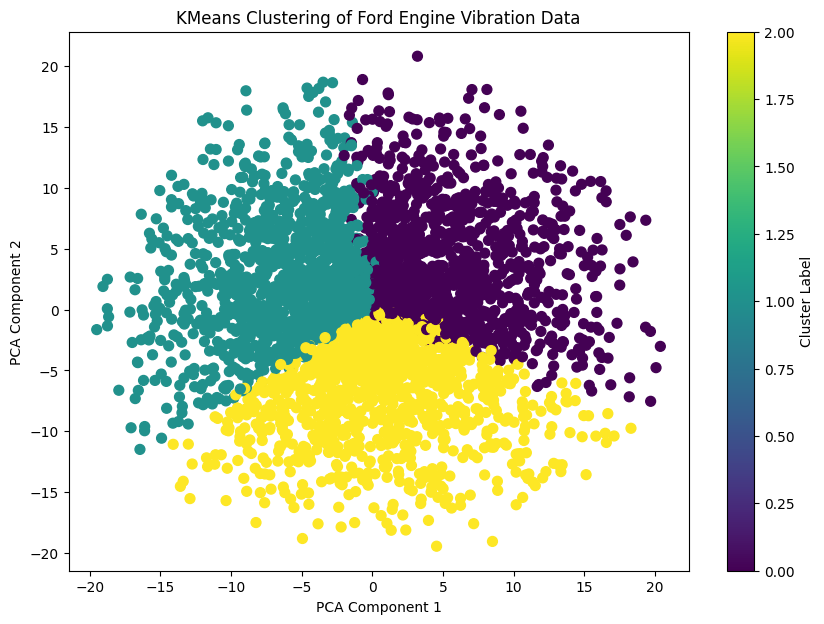

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

# 'target' 열을 제거하여 군집화를 위한 데이터 준비
X = df.drop('target', axis=1)

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA를 사용하여 데이터 시각화를 위해 차원 축소 (2차원으로)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans 클러스터링 (예: 3개의 클러스터)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# PCA로 축소된 데이터 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('KMeans Clustering of Ford Engine Vibration Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# 데이터 기본 정보 확인
print(df.info())
print(df.describe())

# 데이터의 특성 분포 시각화
sns.pairplot(df.sample(100))  # 데이터 샘플링하여 시각화
plt.show()

# 타겟 열 제거
X = df.drop('target', axis=1)

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# PCA로 축소된 데이터 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('KMeans Clustering of Sensor Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Columns: 501 entries, att1 to target
dtypes: float64(500), object(1)
memory usage: 13.8+ MB
None
              att1         att2         att3         att4         att5  \
count  3601.000000  3601.000000  3601.000000  3601.000000  3601.000000   
mean     -0.016708    -0.015270    -0.013605    -0.011943    -0.009966   
std       1.058455     1.051904     1.044560     1.042573     1.046933   
min      -3.933454    -3.656912    -3.479467    -3.595350    -3.773891   
25%      -0.685693    -0.699526    -0.688302    -0.709732    -0.694991   
50%      -0.007573    -0.003044    -0.003066     0.008598     0.001042   
75%       0.660360     0.674898     0.683698     0.679474     0.697530   
max       3.503936     3.369278     3.498286     3.493830     3.293318   

              att6         att7         att8         att9        att10  ...  \
count  3601.000000  3601.000000  3601.000000  3601.000000  3601.000000  ...   
mean

SystemError: <function _LazyTickList.__get__ at 0x0000024423C8C2C0> returned NULL without setting an exception

Error in callback <function _draw_all_if_interactive at 0x0000024426E9F600> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 125000x125000 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 125000x125000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 125000x125000 with 52928 Axes>